In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
idx = 100

# LIOEKF_handsfree_imu = np.loadtxt('../../dataset/rosbag/newer_college/64beam/01_short/00/lio_ekf_01.txt', usecols=(1,2,3), unpack=True)
LIOEKF_IN_PIN_imu_imu = np.loadtxt(
    '../../../dataset/rosbag/ntu_viral/nya_03/lidar_vert/pin_lio_ekf_odo.txt', 
    usecols=(1,2,3), skiprows=66, unpack=True)[:, :500]
LIOEKF_IN_PIN_os1_cloud_node1_imu = np.loadtxt(
    '../../../dataset/rosbag/ntu_viral/nya_03/lidar_vert/pin_lio_ekf_odo_os1_cloud_node1.txt', 
    usecols=(1,2,3), skiprows=66, unpack=True)[:, :500]
LIOEKF_IN_PIN_os2_cloud_node1_imu = np.loadtxt(
    '../../../dataset/rosbag/ntu_viral/nya_03/lidar_vert/pin_lio_ekf_odo_os2_cloud_node1.txt', 
    usecols=(1,2,3), skiprows=66, unpack=True)[:, :100]
pin_odom = np.loadtxt('../../../dataset/rosbag/ntu_viral/nya_03/lidar_vert/odom_poses_kitti.txt', delimiter=' ', usecols=(3, 7, 11), unpack=True)[:, :2000]
pin_slam = np.loadtxt('../../../dataset/rosbag/ntu_viral/nya_03/lidar_vert/slam_poses_kitti.txt', delimiter=' ', usecols=(3, 7, 11), unpack=True)[:, :2000]

In [3]:
# trans = np.array([[ 1,  0, 0],
#                   [ 0, -1, 0],
#                   [ 0,  0,-1]])

# LIOEKF_IN_PIN_imu_imu = trans @ LIOEKF_IN_PIN_imu_imu
# LIOEKF_IN_PIN_os1_cloud_node1_imu = trans @ LIOEKF_IN_PIN_os1_cloud_node1_imu

trans = np.array([  [ -1,  0,  0],
                    [  0,  0, -1],
                    [  0, -1,  0]])
LIOEKF_IN_PIN_os2_cloud_node1_imu = trans @ LIOEKF_IN_PIN_os2_cloud_node1_imu

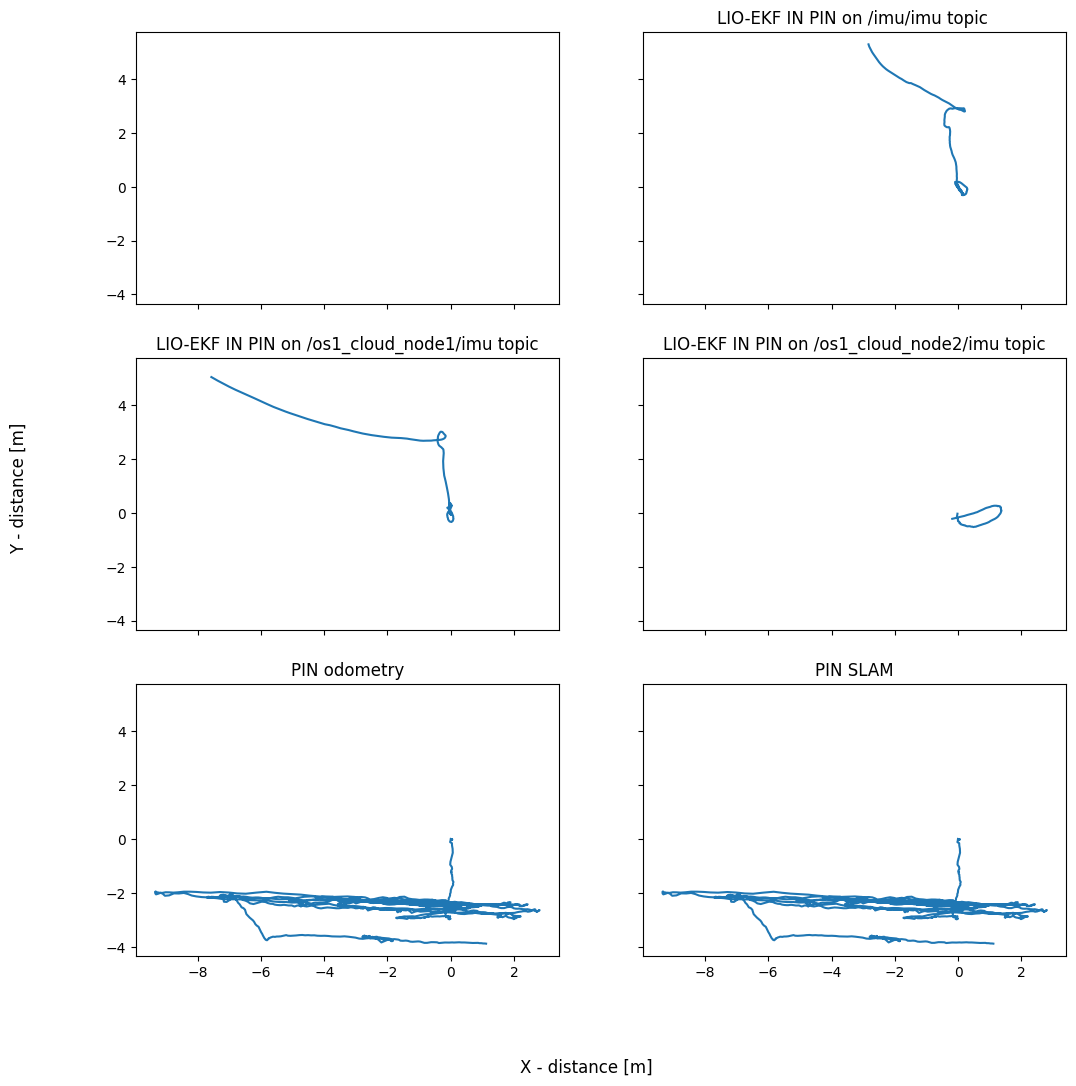

In [8]:
figure, axis = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(12, 12))

# axis[0][0].plot(LIOEKF_handsfree_imu[0], LIOEKF_handsfree_imu[1])
# axis[0][0].set_title("LIO-EKF on /handsfree/imu topic")
axis[0][1].plot(LIOEKF_IN_PIN_imu_imu[0], LIOEKF_IN_PIN_imu_imu[1])
axis[0][1].set_title("LIO-EKF IN PIN on /imu/imu topic ")
axis[1][0].plot(LIOEKF_IN_PIN_os1_cloud_node1_imu[0], LIOEKF_IN_PIN_os1_cloud_node1_imu[1])
axis[1][0].set_title("LIO-EKF IN PIN on /os1_cloud_node1/imu topic")
axis[1][1].plot(LIOEKF_IN_PIN_os2_cloud_node1_imu[0], LIOEKF_IN_PIN_os2_cloud_node1_imu[1])
axis[1][1].set_title("LIO-EKF IN PIN on /os1_cloud_node2/imu topic")
axis[2][0].plot(pin_odom[0], pin_odom[1])
axis[2][0].set_title("PIN odometry")
axis[2][1].plot(pin_slam[0], pin_slam[1])
axis[2][1].set_title("PIN SLAM")

figure.supxlabel('X - distance [m]')
figure.supylabel('Y - distance [m]')
plt.show()

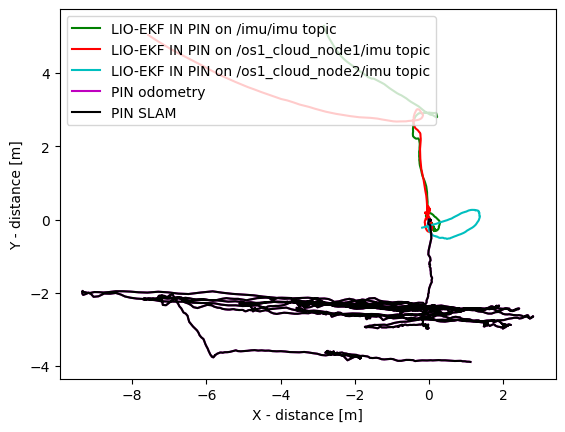

In [5]:
# plt.plot(LIOEKF_handsfree_imu[0], LIOEKF_handsfree_imu[1], label='LIO-EKF on /handsfree/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_imu_imu[0], LIOEKF_IN_PIN_imu_imu[1], label='LIO-EKF IN PIN on /imu/imu topic', color='g') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu[0], LIOEKF_IN_PIN_os1_cloud_node1_imu[1], label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic', color='r') 
plt.plot(LIOEKF_IN_PIN_os2_cloud_node1_imu[0], LIOEKF_IN_PIN_os2_cloud_node1_imu[1], label='LIO-EKF IN PIN on /os1_cloud_node2/imu topic', color='c') 
plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (18, 18)

plt.xlabel('X - distance [m]')
plt.ylabel('Y - distance [m]')
plt.show()

# PLOT HEIGHT

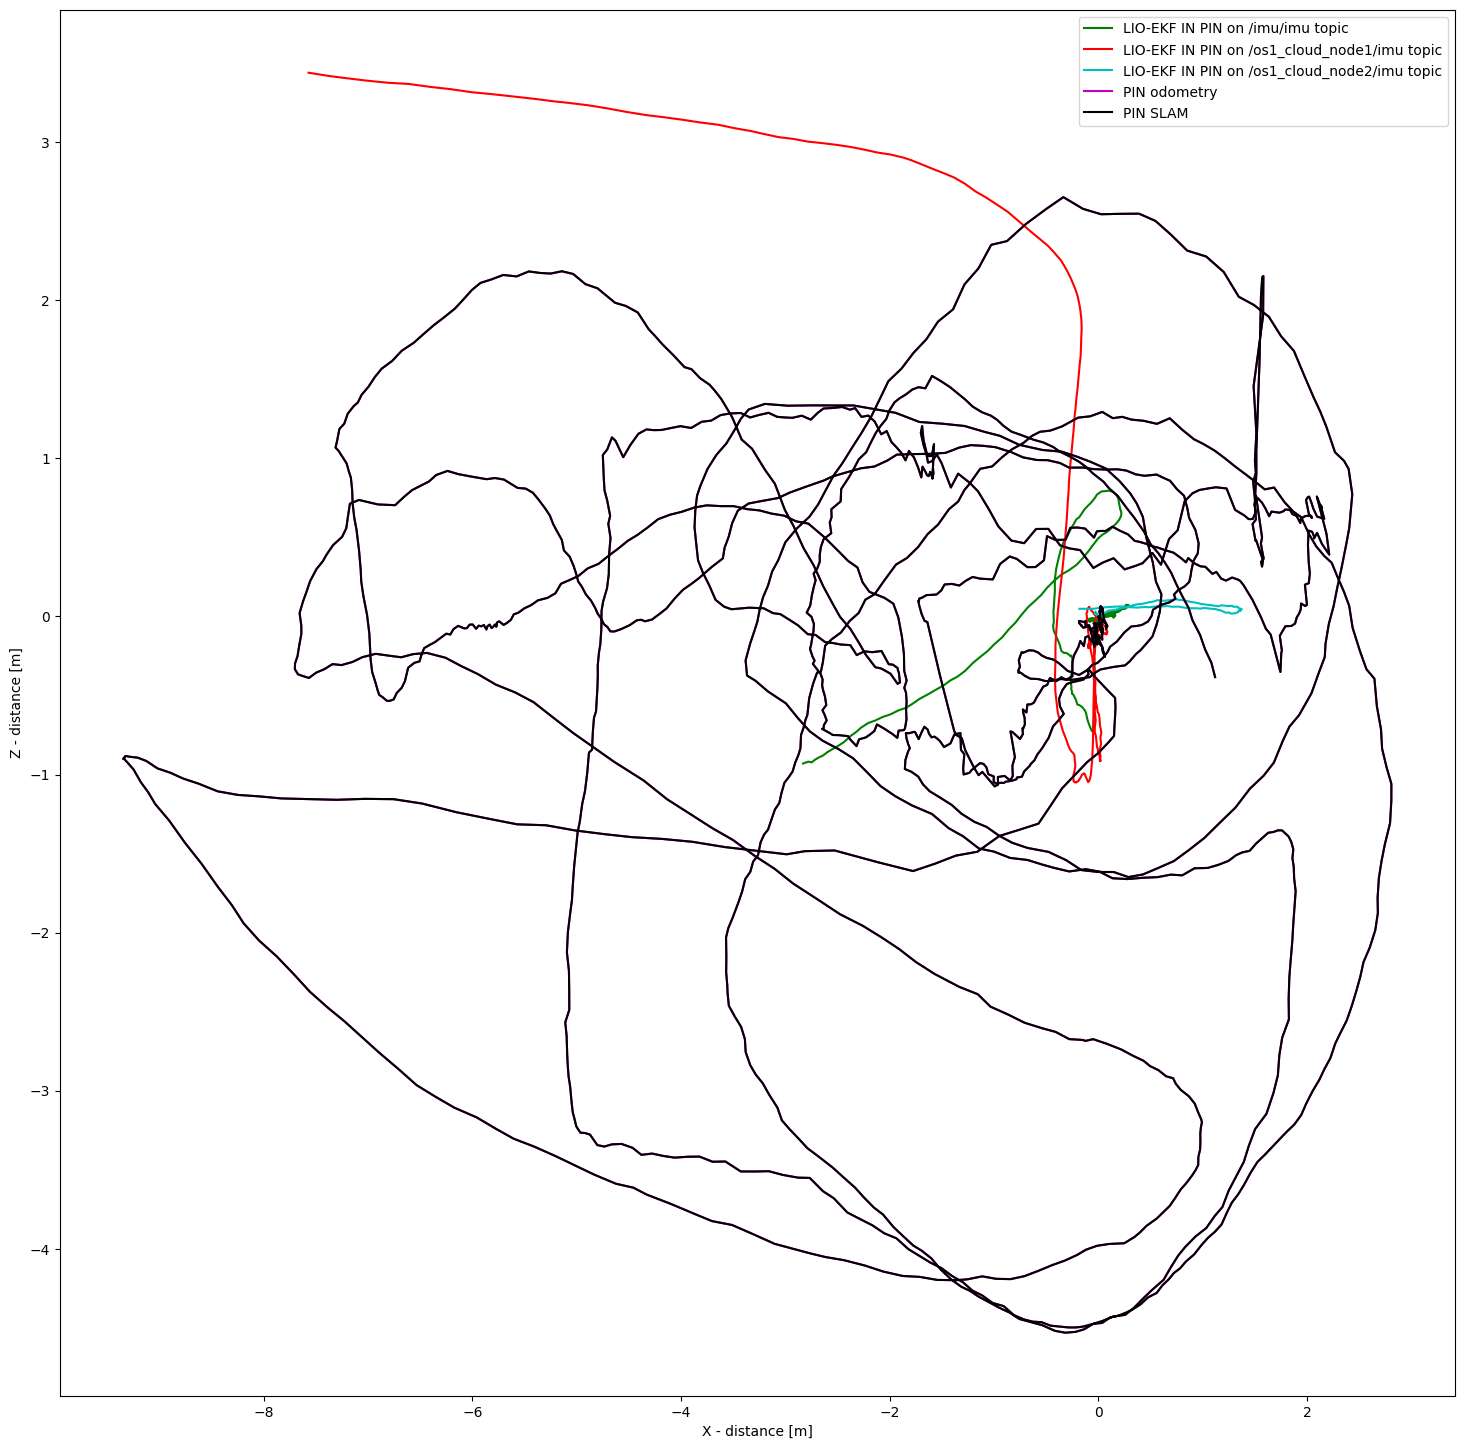

In [6]:
# plt.plot(LIOEKF_handsfree_imu[0], LIOEKF_handsfree_imu[2], label='LIO-EKF on /handsfree/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_imu_imu[0], LIOEKF_IN_PIN_imu_imu[2], label='LIO-EKF IN PIN on /imu/imu topic', color='g') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu[0], LIOEKF_IN_PIN_os1_cloud_node1_imu[2], label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic', color='r') 
plt.plot(LIOEKF_IN_PIN_os2_cloud_node1_imu[0], LIOEKF_IN_PIN_os2_cloud_node1_imu[2], label='LIO-EKF IN PIN on /os1_cloud_node2/imu topic', color='c') 
plt.plot(pin_odom[0], pin_odom[2], label='PIN odometry', color='m') 
plt.plot(pin_slam[0], pin_slam[2], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (16, 16)

plt.xlabel('X - distance [m]')
plt.ylabel('Z - distance [m]')
plt.show()

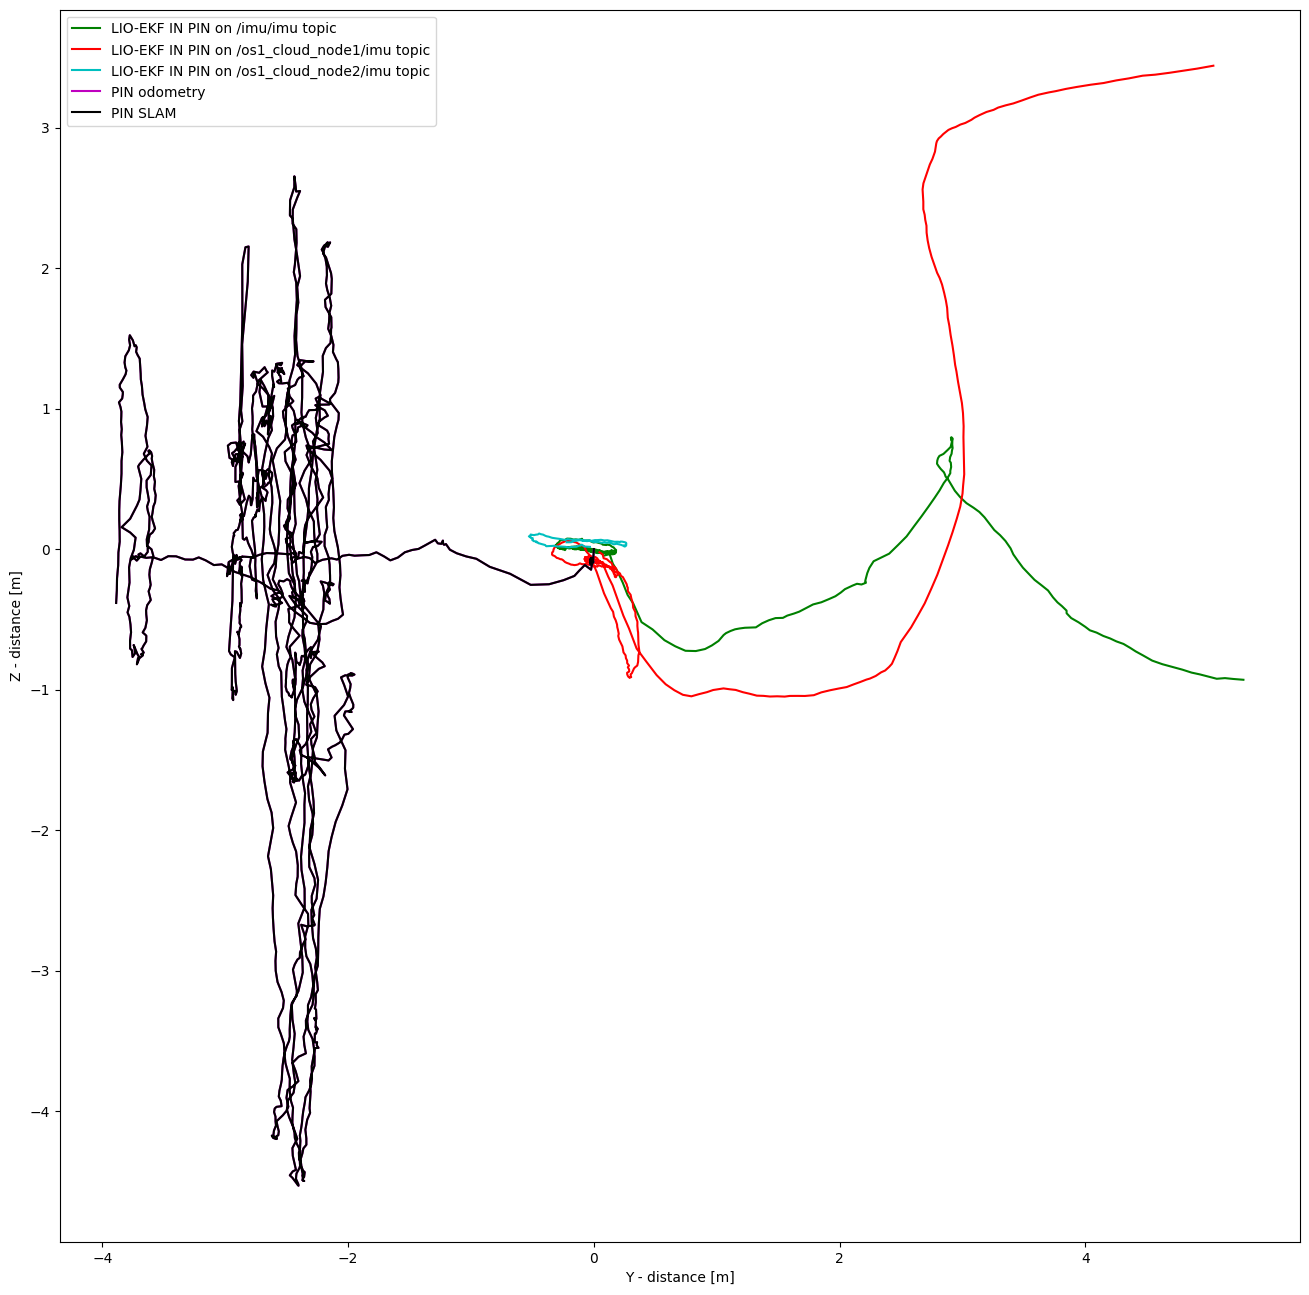

In [7]:
# plt.plot(LIOEKF_handsfree_imu[1], LIOEKF_handsfree_imu[2], label='LIO-EKF on /handsfree/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_imu_imu[1], LIOEKF_IN_PIN_imu_imu[2], label='LIO-EKF IN PIN on /imu/imu topic', color='g') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu[1], LIOEKF_IN_PIN_os1_cloud_node1_imu[2], label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic', color='r') 
plt.plot(LIOEKF_IN_PIN_os2_cloud_node1_imu[1], LIOEKF_IN_PIN_os2_cloud_node1_imu[2], label='LIO-EKF IN PIN on /os1_cloud_node2/imu topic', color='c') 
plt.plot(pin_odom[1], pin_odom[2], label='PIN odometry', color='m') 
plt.plot(pin_slam[1], pin_slam[2], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (16, 16)

plt.xlabel('Y - distance [m]')
plt.ylabel('Z - distance [m]')
plt.show()